# Notebook for development of the script - 1

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import *
import reprlib

In [2]:
class Genome:
    """Classe Genome"""
    def __init__(self, seq, circular=True):
        self.seq=seq
        self.len=len(seq)
        self.circular=circular
        
    def __str__(self):
        """To show the attributes and values of the instance"""
        out=''
        for key, value in self.__dict__.items():
            out+='{:20s}  {}\n'.format(key, reprlib.repr(value))
        return out

    def sequencing(self, read_length=100, reads_nb=5000):
        reads=[]
        for _ in range(reads_nb):
            start = rd.randint(0, self.len-1)
            read_seq = self.seq[start:min(start+100, self.len)] + self.seq[0:max(start+100-self.len, 0)]
            read = Read(read_seq)
            reads.append(read)
        return reads


In [3]:
class Read:
    """Classe Read"""
    def __init__(self, seq):
        self.seq=seq
        self.len=len(seq)
    
    def __str__(self):
        """To show the attributes and values of the instance"""
        out=''
        for key, value in self.__dict__.items():
            out+='{:20s}  {}\n'.format(key, reprlib.repr(value))
        return out
    
    def generate_kmers(self, kmers_length=30):
        """Returns a list of the k-mers included in the read"""
        kmers=[]
        for i in range(self.len - kmers_length):
            kmer_seq = self.seq[i:i+kmers_length]
            kmer = Kmer(kmer_seq)
            kmers.append(kmer)
        return kmers


In [47]:
class Kmer:
    """Classe Kmer"""
    def __init__(self, seq):
        self.seq = seq
        self.len = len(seq)
        self.prefix = seq[:-1]
        self.suffix = seq[1:]
    
    def __str__(self):
        """To show the attributes and values of the instance"""
        out=''
        for key, value in self.__dict__.items():
            out+='{:20s}  {}\n'.format(key, reprlib.repr(value))
        return out
    
    def __hash__(self):
        return self.seq.__hash__()
    
    def __eq__(self, kmer2):
        if self.seq == kmer2.seq: return True
        return False
    
    

In [49]:
# PROGRAMME PRINCIPAL
# Genome generation
genome_length= 10000
genome= Genome(''.join(rd.choices(["A", "T", "G", "C"], k=genome_length)), circular=True)
print(genome, end='\n\n')

# Reads generation
reads = genome.sequencing(read_length=100, reads_nb=5000)
print(*[read for read in reads[:3]], end='\n\n')

# K-mers generation
kmers=set()
for read in reads:
    kmers.update(read.generate_kmers(kmers_length=30))
for kmer in kmers:
    break
print(kmer, end='\n\n')


seq                   'CCAGCGGTATGT...AATACCCCCCTTC'
len                   10000
circular              True


seq                   'TTAAAATCTTGT...ACAATTCTGCTAC'
len                   100
 seq                   'GTCAGACGACTG...ACCTACCAGTCAC'
len                   100
 seq                   'GCCATACCGTTA...TAGGGTCAAGCGC'
len                   100


seq                   'TGCAATCCTGCG...CGCTACCATAAGT'
len                   30
prefix                'TGCAATCCTGCG...ACGCTACCATAAG'
suffix                'GCAATCCTGCGG...CGCTACCATAAGT'




---

In [3]:
# Genome generation
size_genome=10000

genome = ''.join(rd.choices(["A", "T", "G", "C"], k=size_genome))
genome

'GAAGAAGAGCGCTTTTTCAATTTTTGCACAACCACGCGTGAAAGTTTGACGGGAAAGATCCAGAATCCATCGCGCCGAACTTCTAGATAGTGCTATGATGAGATGCTTAGTTATTCGGGGGCCGGGATGTCGCGGGACCGTCATGGACTAGTACTAGTACATTCAGATACGGCCCCACCGCTCACTGTTTGTCACGACCCCTTCACCTCTTGCTTTGCAAACACCGTTCTAGTTGCGACACCTTAGTTGAGACCTCTGTATTTTCCACCCAGCTCAAATTTTATGTAGGCCTGGCAGAGGATCAATTATATGGGCGTCAGCCTCTCGAGTGGCTATGCTGGTCAGTTAAACAAGCGGCTAGTTAAAATATCATCGCGTGGAAGCCAAATATTGGACATCTACTTCACAGATTGAGAATTGATTTCTCCCCGTCCCTCTTCGCATAGTCAATTAGGGTAGCTCTTAGCCAGCTTACTTCTTCGCCCTCTGGTACTACATTACGGCCGATAAGTTTGGTGTGGTGCGACAGCGGTCTGTCGTAGCGGCCCGGCAAGCCTAGACCACGGCGGAGGGTAGACGGCTAAGATCGGCTTCGTGGCAGCGCTACCTAAAAAACGCGGCACGGCCGCACCGGTACACTTTCCACGTAGCTTGGAGGCCCTGTTAAGCCTTTTCCCAGGGGAAGGATAAGGCACGGAGATGCAGACCTTGGCTAGGCCGTGCATTTCGAGATACAGAACGTCATCCTCCCGGGAATGAGGGAACGTTTGAGGAGGCATCTTAAAGTTAGCACCTTGACTTTCTTAGATCAAGACATCGCAATACTACTAAAAGTGCGGGATATAAACCGCCGGCTAAGGAGAATTGAGTTGCCCCGGACTAGATATGATCCCGTTGCTCGCCCTCTAGCCCGCACATCCCTTCACGTTGTATCAGTGCGACGGACACCACCCCCCGGCAATTGTTGTGCAATGTTTTCTAAACGATACATGAAGCCAA

In [4]:
# Reads generation
size_reads=100
nb_reads=5000

list_reads=[]
for _ in range(nb_reads):
    start = rd.randint(0, size_genome-1)
    read = genome[start:min(start+100, size_genome)] + genome[0:max(start+100-size_genome, 0)]
    list_reads.append(read)
    
list_reads

['TATATGATAACATCTAAATACTGTTTGTTCATTGTAAAGTTCACAACCTCAGCGTGCGATGGATCAGCGAGCTCACCTTGAGGTGTTTTGAGAGACGCAT',
 'CTATGTAACTGAGAGAAAGTTTCGGGTATAAAGTTCTGAATCGTTATTGAGTGAGGCCAAGTCGTTCTCTCGAAGCCGCGCGTCATGTAACGTCATGAAC',
 'GATCATTGCGTTGAAGAGTGTAAGCTGAACCGTCGTTAGCTCGCTACAGCAATATACGCGCGTAGTGAGCGTATAATACTTCAGTCAAGGTAACCTCATT',
 'GTCATGCCGATCTTATAGATCAGTGGTCGCATCTGTAGCCCTACCGGGGCTATGGCGATACCGCAAAGGGACCATGCGAGGGCTCACTTCCTAGCCTGAA',
 'GCTAGCAGGTAAATGCCGGTTCTCCGAGCCGGGAATGGGCGCTACAAAGTTGGTGAGCACGTTTCATTTCAATAAGAGTTATCATTAGCTCCTATCAGAT',
 'AATATAAGGTCATGAGAGGCTCGGTTTGGGGTCTCGTGGTGACCCTAAGATAGGCACGACGCGAGCTTTTCACAGCCGAGGGGTCTCAAGTGGCAGTTCC',
 'TAGTAGTACTAACCAATGACGGAGCACAACAGACAGCCTGGCGTACTTACACCCTCAAGAAGCATGACCGCGCTTCCACTTTTCCGTAAATATAGACCCG',
 'TTCGTTTGGAGGACGGCCATTTTGTCGCGTCGTTCGTCTGGGTCTTGAACGAGTCGGTATATGATAACATCTAAATACTGTTTGTTCATTGTAAAGTTCA',
 'AAAAGTGTCTTCGTGAACTCGCCTTTGGCAGAGACGGGTTATAACAAGTTCTCAGGCGTGCGGAGATGTACAAAGCGGCTCGACTTTTCAGGGGGCTTAC',
 'ACACAGGATCTTAATCCCTCAATGTGAACATTCTGCGAGCTAGCAGGTAAATG

In [5]:
# K-mers generation
size_kmers=30

set_kmers=set()
for read in list_reads:
    for i in range(size_reads-size_kmers):
        set_kmers.add(read[i:i+size_kmers])

In [6]:
#test nb k-mers = taille genome (apres set) : coverage suffisant + pas de repetitions
len(set_kmers)

10000

In [7]:
# (K-1)-mers generation
ordset_km1=set()

for kmer in set_kmers:
    ordset_km1.add(kmer[1:])    # suffixe
    ordset_km1.add(kmer[:-1])   # prefix
ordset_km1 = list(ordset_km1)
    
nb_km1=len(ordset_km1)
print(nb_km1)
# s'il y a autant de k-1mers que de k-mers, alors il n'y a q'un seul cycle dans le graphe (cas idéal)

10000


In [62]:
# Graph generation
# prefix on rows
# suffix on columns
graph=np.zeros((nb_km1, nb_km1))

for kmer in set_kmers:
    i = ordset_km1.index(kmer[:-1]) #prefix
    j = ordset_km1.index(kmer[1:])  #suffix
    graph[i, j]+=1
    

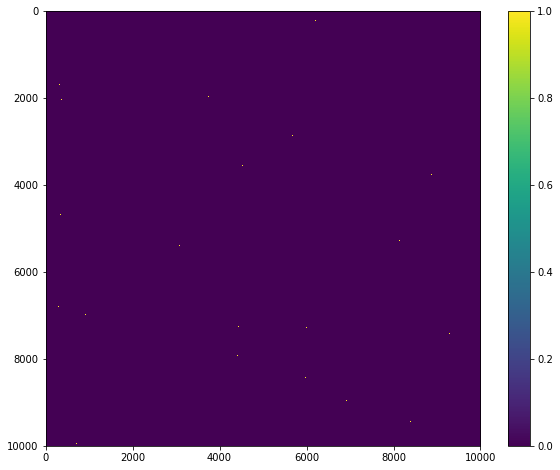

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.imshow(graph) 
plt.colorbar()

In [ ]:
# Si set k-mers, on a que des & dans le graph
# La diagonale peut etre non nulle si un k-mer est composé de la meme lettre. ex GGGG

In [20]:
# Test graph Eulerien
success=True
for i in range(nb_km1):
    if graph[i,:].sum() != graph[:,i].sum():
        print("PROBLEM : Ce graphe n'est pas Eulerien !!")
        success=False
        break
if success:    
    print("SUCCESS !! Ce graphe est Eulerien !!")


SUCCESS !! Ce graphe est Eulerien !!


In [ ]:
# Parcours du graphe
    




In [63]:
# Reconstitution pour un graph eulerien a 1 cycle
sequence= ordset_km1[0] #sequence pour reconstitution du genome. 
                        #Init au premier (k-1)-mer
i=0        #index prefix
j=0        #index suffix
i_stop=-1  #condition pour tester le retour au premier (k-1)-mer (fin du cycle)


while i_stop!=0:
    if graph[i, j]==0:               # Si il n'y a pas de lien entre prefix et suffix
        j+=1
    elif graph[i, j]==1:             # Si il y a un lien entre prefix et suffix
        sequence+= ordset_km1[j][-1]    # ajoute le dernier nucleotide du suffixe a la sequence
        graph[i, j]-=1                  # supprime le lien du graphe
        i=j                             # le suffix devient le nouveau prefix
        i_stop=i                        # actualisation de la condition d'arret
        j=0                             # reinitialisation de l'index du suffix
        
print(sequence)


GTTATGAATCATCATCGGGTGGCCTTGAG
GTTATGAATCATCATCGGGTGGCCTTGAGTATGAGCGTCGAGACGATGCGCTGTGTACAATAAAGTACTGCAGAACGCTGCATCTGGAAGTTCGCGTTAAACCCGTGGATGTCATTGATGCATGTCGTGTAACTCCCCCAAGGTTATGTAAAACCAATAAGGGCGGACGTGAAACCGCGTTGGATTATGTTCTGTTTATTCTGGACAGCCTTGTAGCTCGGCTGGCCTAGGCTCCATTCGCTCAGAGCGGTTTCGTCTGCTTCTACTTAAAAACGTAAAACATTCATATACCCGATCCGAGACCTGGTCACTACTACCCGACGCTGACGAGGGTGGTATAGGAAACCACGAAACGACCCGCCCGGCATCCGTTTCCGTAGGCCCTTCGATGAGCAGTTACCGATTGATAAAGATATAAGATTCACTGGATCTCTCCTTCTTATTCGAGGTGGTCATCACAAGATGAGTTGGTAATCCTTAACAGATGATGGGTGCGCAGTAAAATACGTTGCCCTTAATGAGCGTTCGTCAAGTGTCTAGCCGTACCGAAGACTCCTTCCAAATGGCGTACAAAAGTGTCTTCGTGAACTCGCCTTTGGCAGAGACGGGTTATAACAAGTTCTCAGGCGTGCGGAGATGTACAAAGCGGCTCGACTTTTCAGGGGGCTTACGGATCAGATTCTCACTCCGCGCACATGAGCGTAAGTTTATGTATTAGGGTGCGCATGAGGAGACATTAGGGCTGCTTCTGTCATTGGCCAGTCTCTAGGCCCCACCGCATTAAGCACTAATTGTTGTCGAAGTCTCTTCCTCGTTCTCGGGACCATCGGTTGGTGGCATCCAGAAGCAGTCGACCCCAATGCGTTTTAGGCATTTTCTCATTAGGTCAGAGAGCCCGAAACCGGGCGCAGTAGACCATACTAGGGGTGACTACTCAATACGTCCGAAACGCCCCTTTGCCAGTCCGCAC

In [ ]:
sequence.index(genome[:40])

seq2=sequence[:10000]

genome[:40]

seq3=seq2[4512:]+seq2[:4512]

seq3==genome

---

In [ ]:
# Classe genome qui hérite de la classe Seq de Biopython
class Genome(Seq):
    """Classe Genome"""
    def __init__(self, sequence, circular=True):
        Seq.__init__(self, sequence)
        self.circular=circular
        
    def show(self):
        """Prints the attributes and values of the instance"""
        for key, value in self.__dict__.items():
            print('{:30s}{}'.format(key, value))




size_genome= 10000
genome= Genome(''.join(rd.choices(["A", "T", "G", "C"], k=size_genome)), circular=True)
genome.show()